Numpy for scientific computing and Matplotlib for plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

For same random variables every time we run this code

In [2]:
np.random.seed(0)

# Dog and Cat Data #
>on the basis of their
1. Falppiness Index 
2. Whisker Length

In [3]:
# Dogs: Higher ear flappiness index and Lower whisker length
dog_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=100)
dog_whisker_length = np.random.normal(loc=5, scale=1, size=100)

In [4]:
# Cats: Lower ear flappiness index and Higher whisker length
cat_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=100)
cat_whisker_length = np.random.normal(loc=8, scale=1, size=100)

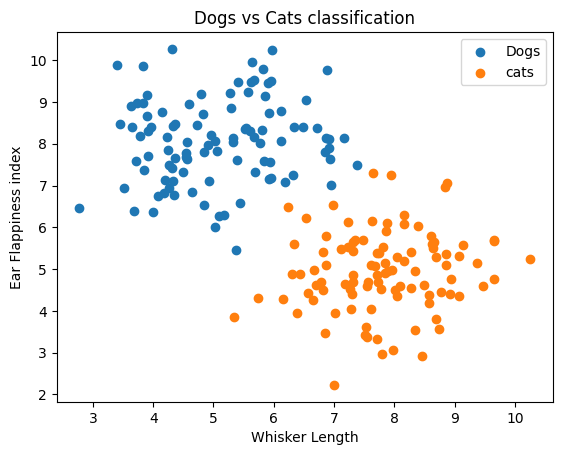

In [5]:
#Plot the Data Points
plt.scatter( dog_whisker_length, dog_ear_flappiness_index, label= 'Dogs')
plt.scatter( cat_whisker_length, cat_ear_flappiness_index, label= 'cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness index')
plt.title('Dogs vs Cats classification')
plt.legend() #Shows the dogs nad cat label in the upper right corner
plt.show()

In [6]:
#implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):     # d is no. of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size = d)
        theta0 = np.random.normal()

        error = computed_error(data_dogs, data_cats, theta, theta0)

        if(error < best_error):
            best_error = error  
            best_theta = theta  
            best_theta0 = theta0 
        
    

    return best_theta, best_theta0, best_error 



In [7]:
def computed_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x in data_dogs:
        if np.dot(theta, x) + theta0 <=0 :
            error = error +1 
        
    for y in data_cats:
        if np.dot(theta, y) + theta0 >=0 :
            error = error +1
        
    return error  

In [8]:
# Define function for k-fold cross-validation
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            x_train_fold= np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold= np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            x_val_fold= np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold= np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(x_train_fold[y_train_fold == 0], x_train_fold[y_train_fold == 1], k, d)

            errors.append(computed_error(x_val_fold[y_val_fold == 0], x_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold))
        
        avg_errors.append(np.mean(errors))
    
    best_k = k_values[np.argmin(avg_errors)]
    return best_k



In [9]:
data_dogs = np.vstack((dog_whisker_length, dog_ear_flappiness_index)).T
data_cats = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T
data = np.vstack((data_dogs, data_cats))
labels = np.hstack((np.zeros(len(data_dogs)), np.ones(len(data_cats))))

In [10]:
# Define k vlaues to try
k_values = [1, 10, 50, 100, 250, 500 , 1000]

best_k = cross_validate(data_dogs, data_cats, k_values, d=2)

print(f"best value of k: {best_k}")

best value of k: 100


In [11]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [34]:

x_test

array([[4.82845367, 8.70657317],
       [5.8024564 , 8.33367433],
       [4.23008393, 8.15494743],
       [7.52034419, 3.4170616 ],
       [7.29529972, 4.40268393],
       [8.09435159, 4.58995031],
       [5.31694261, 8.0519454 ],
       [8.28044171, 5.39904635],
       [8.04949498, 4.34759142],
       [5.94447949, 7.5619257 ],
       [3.99978465, 6.36980165],
       [5.74443577, 4.30795015],
       [8.16092817, 5.1887786 ],
       [4.5444675 , 7.68844747],
       [7.01448926, 3.95474663],
       [6.42937659, 4.88389606],
       [6.12663592, 8.06651722],
       [9.36453185, 5.14195316],
       [4.3563816 , 8.46566244],
       [6.18802979, 7.09270164],
       [6.84264474, 3.45920299],
       [5.94725197, 9.49407907],
       [8.5785215 , 4.18663574],
       [3.8319065 , 8.97663904],
       [5.84436298, 7.59821906],
       [4.50196755, 7.32753955],
       [5.62523145, 9.48825219],
       [3.4552289 , 8.46278226],
       [7.68770775, 5.06326199],
       [8.77325298, 4.45713852],
       [6.

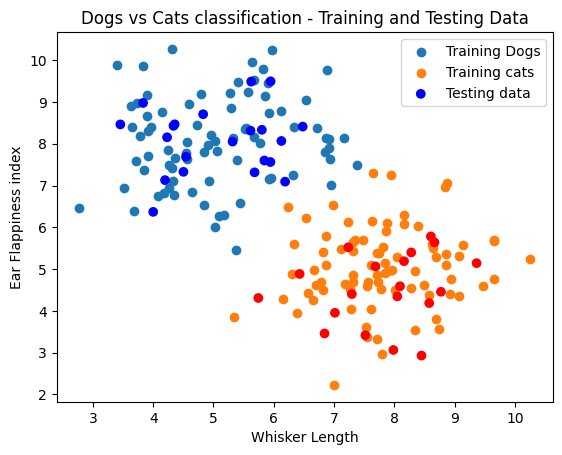

In [14]:
#Plot the Data Points
plt.scatter( x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label= 'Training Dogs')
plt.scatter( x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label= 'Training cats')
plt.scatter( x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', label ="Testing data")
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness index')
plt.title('Dogs vs Cats classification - Training and Testing Data')
plt.legend() #Shows the dogs nad cat label in the upper right corner
plt.show()

In [15]:
# Run random linear classifier algorithm
# k = 100
k = best_k
d = 2
best_theta_train, best_theta0_train, train_error = random_linear_classifier(x_train[y_train == 0], x_train[y_train == 1], k, d)

In [16]:
# Plot the decision boundary
x_vals_train = np.linspace(2, 10 , 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1])* x_vals_train - (best_theta0_train / best_theta_train[1])

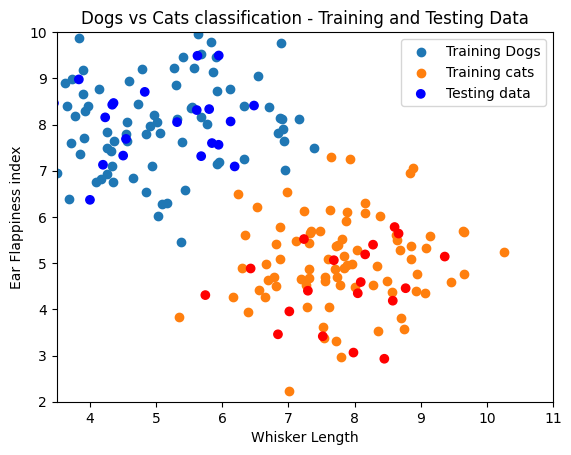

In [17]:
#Plot the Data Points
plt.scatter( x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label= 'Training Dogs')
plt.scatter( x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label= 'Training cats')
plt.scatter( x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', label ="Testing data")
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness index')
plt.title('Dogs vs Cats classification - Training and Testing Data')
plt.legend() #Shows the dogs nad cat label in the upper right corner
plt.show()

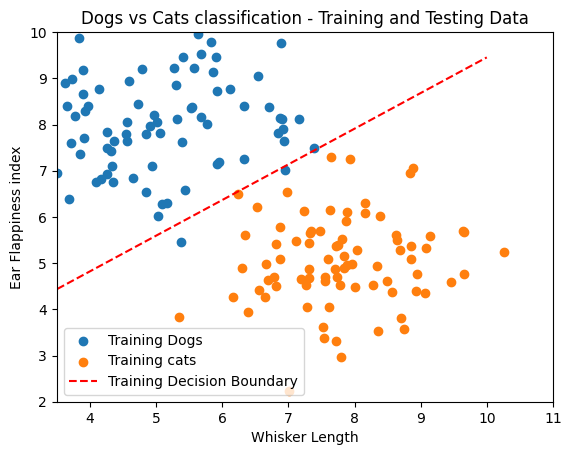

In [18]:
#Plot the Data Points
plt.scatter( x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label= 'Training Dogs')
plt.scatter( x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label= 'Training cats')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label = 'Training Decision Boundary')
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness index')
plt.title('Dogs vs Cats classification - Training and Testing Data')
plt.legend() #Shows the dogs nad cat label in the upper right corner
plt.show()

In [19]:
train_error

2

In [20]:
test_error = computed_error(x_test[y_test == 0], x_test[y_test == 1], best_theta_train, best_theta0_train)
test_error

0

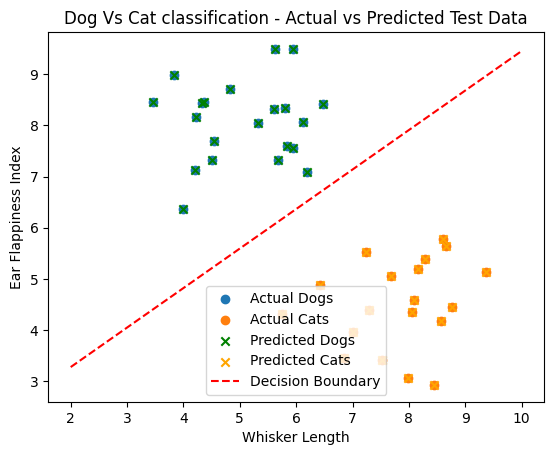

In [37]:
# Plot the actual test data and produced test data
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], label='Actual Dogs')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], label='Actual Cats')

# Plot test data points using the decision boundary
predicted_labels = np.ones_like(y_test)
for i, X_test in enumerate(x_test):
    if np.dot(best_theta_train, X_test) + best_theta0_train > 0:
        predicted_labels[i] = 0

# Plot predicted test data points
plt.scatter(x_test[predicted_labels == 0][:, 0], x_test[predicted_labels == 0][:, 1], marker='x', label='Predicted Dogs', color='green')
plt.scatter(x_test[predicted_labels == 1][:, 0], x_test[predicted_labels == 1][:, 1], marker='x', label='Predicted Cats', color='orange')

# Plot decision boundary
#plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label='Decision Boundary')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Decision Boundary')#instead of above i think this line


plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog Vs Cat classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()